In [1]:
import pandas as pd

In [37]:
import numpy as np

In [2]:
df = pd.read_excel(r'C:\Users\saqli\Desktop\DATA for Strawberry\Ready Dta\Color Data.xlsx')

In [3]:
df

,Parameters,Treatments,Storage Time,Unnamed: 3,Unnamed: 4
0,NaN,NaN,2.00,4.00,6.00
1,L*,Control,17.54,14.79,10.22
2,NaN,1,16.47,13.98,10.76
3,NaN,2,17.43,15.55,10.52
4,NaN,3,17.29,15.48,10.67
5,NaN,4,18.69,15.73,10.71
6,NaN,5,17.58,15.58,10.22
7,NaN,6,16.75,15.33,10.07
8,NaN,7,17.33,15.68,11.12
9,NaN,8,17.49,15.52,11.08


In [5]:
df = df.drop(0)

In [12]:
df = df.rename(columns = {'Storage Time':'Day 2', 'Unnamed: 3':'Day 4', 'Unnamed: 4' : 'Day 6'})

In [13]:
df.head(10)

,Parameters,Treatments,Day 2,Day 4,Day 6
1,L*,Control,17.54,14.79,10.22
2,NaN,1,16.47,13.98,10.76
3,NaN,2,17.43,15.55,10.52
4,NaN,3,17.29,15.48,10.67
5,NaN,4,18.69,15.73,10.71
6,NaN,5,17.58,15.58,10.22
7,NaN,6,16.75,15.33,10.07
8,NaN,7,17.33,15.68,11.12
9,NaN,8,17.49,15.52,11.08
10,NaN,9,18.26,15.88,10.27


In [23]:
l_value = df.iloc[0:11].reset_index(drop = True)
a_value = df.iloc[11:22].reset_index(drop = True)
b_value = df.iloc[22:33].reset_index(drop = True)

In [30]:
a_melt = a_value.melt(id_vars = 'Treatments',
             value_vars = ['Day 2', 'Day 4', 'Day 6'],
             var_name = 'Days',
             value_name = 'a*'
             )
print(a_melt.head(10))

  Treatments   Days    a*
0    Control  Day 2  4.73
1          1  Day 2  7.58
2          2  Day 2  8.82
3          3  Day 2  8.37
4          4  Day 2  8.53
5          5  Day 2  9.12
6          6  Day 2  7.69
7          7  Day 2  6.91
8          8  Day 2  7.51
9          9  Day 2  8.07


In [31]:
l_melt = l_value.melt(id_vars = 'Treatments',
             value_vars = ['Day 2', 'Day 4', 'Day 6'],
             var_name = 'Days',
             value_name = 'L*'
             )
b_melt = b_value.melt(id_vars = 'Treatments',
             value_vars = ['Day 2', 'Day 4', 'Day 6'],
             var_name = 'Days',
             value_name = 'b*'
             )

In [34]:
df_merged = l_melt.merge(a_melt, on = ['Treatments', 'Days']).merge(b_melt, on = ['Treatments', 'Days'])

In [35]:
df_merged

,Treatments,Days,L*,a*,b*
0,Control,Day 2,17.54,4.73,19.5
1,1,Day 2,16.47,7.58,18.8
2,2,Day 2,17.43,8.82,19.7
3,3,Day 2,17.29,8.37,19.2
4,4,Day 2,18.69,8.53,20.0
5,5,Day 2,17.58,9.12,18.9
6,6,Day 2,16.75,7.69,18.5
7,7,Day 2,17.33,6.91,19.8
8,8,Day 2,17.49,7.51,19.6
9,9,Day 2,18.26,8.07,20.0


In [ ]:
# Initial L*, a*, b* values
L0, a0, b0 = 19.05, 6.01, 19.46

# Calculate delta E using the formula: ΔE = √((L*-L0)² + (a*-a0)² + (b*-b0)²)
df_merged['Delta_E'] = np.sqrt(
    (df_merged['L*'] - L0) ** 2 +
    (df_merged['a*'] - a0) ** 2 +
    (df_merged['b*'] - b0) ** 2
)

# Display the updated DataFrame
df_merged.head()

,Treatments,Days,L*,a*,b*,Delta_E
0,Control,Day 2,17.54,4.73,19.5,1.979924
1,1,Day 2,16.47,7.58,18.8,3.091424
2,2,Day 2,17.43,8.82,19.7,3.252399
3,3,Day 2,17.29,8.37,19.2,2.955470
4,4,Day 2,18.69,8.53,20.0,2.602230


In [39]:
df_merged

,Treatments,Days,L*,a*,b*,Delta_E
0,Control,Day 2,17.54,4.73,19.5,1.979924
1,1,Day 2,16.47,7.58,18.8,3.091424
2,2,Day 2,17.43,8.82,19.7,3.252399
3,3,Day 2,17.29,8.37,19.2,2.955470
4,4,Day 2,18.69,8.53,20.0,2.602230
5,5,Day 2,17.58,9.12,18.9,3.485197
6,6,Day 2,16.75,7.69,18.5,3.005661
7,7,Day 2,17.33,6.91,19.8,1.970787
8,8,Day 2,17.49,7.51,19.6,2.168686
9,9,Day 2,18.26,8.07,20.0,2.271409


In [56]:
df_pivot = df_merged.pivot(index = 'Days', columns = 'Treatments', values = 'Delta_E')

<Axes: xlabel='Days'>

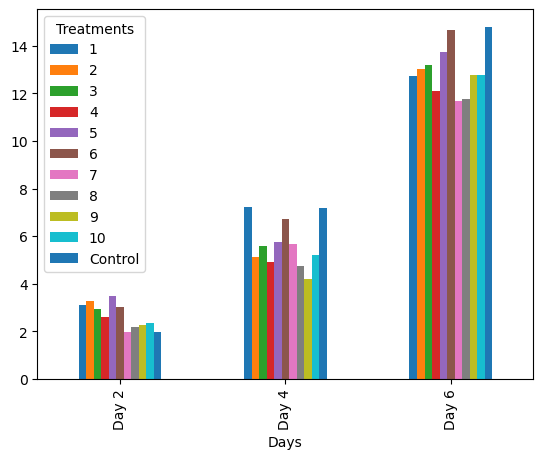

In [59]:
df_pivot.plot(kind = 'bar')